In [28]:
import numpy as np
import pandas as pd
import os, time, logging
from src.data import Hicmat, plot_data, preprocess_data
from src.tad_algo import TopDom, TADtree
from src.utils import *

In [3]:
folder = os.path.join('..', 'CHROMOSOMES', 'GM12878', '100kb')
data_path = os.path.join(folder, 'chr1_100kb.npy')
resolution=100000

In [4]:
if not os.path.isfile(data_path):
    preprocess_data(folder, resolution)

In [5]:
hic_mat = Hicmat(data_path, resolution)

In [6]:
hic_mat.filter(threshold = 1)

c:\Users\llego\MEET-U\Team-SA1\src\data.py:59: RuntimeWarning: divide by zero encountered in log10
  m = np.log10(m)


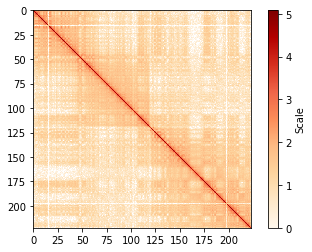

In [7]:
plot_data(hic_mat.reduced_matrix, resolution)

In [31]:
topdom = TopDom()
topdom_tads = topdom.getTADs(hic_mat, window=2)

TopDom Step 1 : Generating binSignals by computing bin-level contact frequencies
TopDom Step 2 : Detect TD boundaries based on binSignals
TopDom Step 3 : Statistical Filtering of false positive TD boundaries
TopDom : Exporting TADs


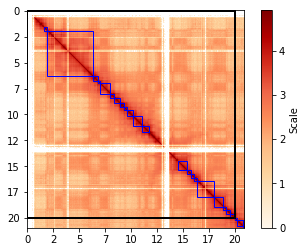

In [32]:
plot_data(hic_mat.original_matrix, resolution, region=(0,20000000), tads=topdom_tads)

In [24]:
def read_consensus(path):
    f = open(path)
    in_list = False
    TADs = []
    in_a, in_b = False, False
    for i in f.readline():
        if i == '[':
            in_list = True
        if not in_list:
            continue
        if i == ')':
            TADs.append((int(a), int(b)))
            in_b=False
            continue
        if i == '(':
            in_a = True
            a=''
            b=''
        elif i==',':
            in_a = False
            in_b = True
        elif in_a:
            a+=i
        elif in_b:
            b+=i
    return TADs


chr = os.path.join('..', 'results_consensus', 'GM12878_100kb_resolution_intrachromosomal_chr1_100kb.bananatads.txt')
consensus = read_consensus(chr)
len(consensus)
    

1245

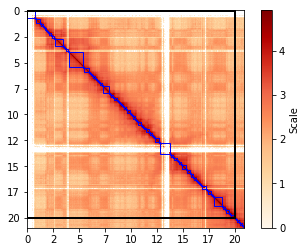

In [26]:
plot_data(hic_mat.original_matrix, resolution, region=(0,20000000), tads=consensus)

In [29]:
truth = read_arrowhead_result(os.path.join('..', 'RESULTS', 'GSE63525_GM12878_primary+replicate_Arrowhead_domainlist.txt'), '1')

c:\Users\llego\MEET-U\Team-SA1\src\data.py:59: RuntimeWarning: divide by zero encountered in log10
  m = np.log10(m)


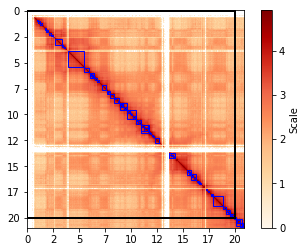

In [30]:
plot_data(hic_mat.original_matrix, resolution, region=(0,20000000), tads=truth)

In [15]:
tadtree = TADtree()
tadtree_tads = tadtree.getTADs(hic_mat)

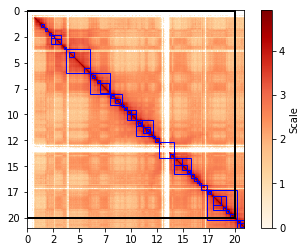

In [ ]:
plot_data(hic_mat.original_matrix, resolution, region=(0,20000000), tads=tadtree_tads)